<a href="https://colab.research.google.com/github/univ-3360-vu-smartcities/AlumniHallDataAnalysis/blob/master/Alumni%20Hall%20Data%20Analysis%20Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NB: You might have to link colab to your github account when you open this notebook

### Incase you are opening the notebook directly in colab, install dependencies using the following cell

In [ ]:
!git clone https://github.com/univ-3360-vu-smartcities/AlumniHallDataAnalysis.git
!cd AlumniHallDataAnalysis
!mkdir data
!pip install -r requirements.txt

### Make sure you download the csv files from VU Box into the data folder

### Dataprocesor file

1. The file "datautils.dataprocessor" contains methods that help in cleaning and preprocessing data from the Alumni Hall database. 

2. Individual Method descriptions are provided in the datautils/dataprocessor.py file itself through DocStrings. 

3. Any other method can be added to the file as needed.

4. Example Usage of these methods are provided below.

In [1]:
# helper module to load the Alumni Hall data and process it
from datautils import dataprocessor as dp

# Acquiring the Occupancy raw data

In [2]:
# load data path
df = dp.readfile('./data/occupancyStatus.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe. 
# Note: order of operations are important. For example we cannot parse datetime from the data before converting it
# from file to dataframe(file2df)
processmethods = ['file2df', 'datetime_parse_df']
df = df.return_df(processmethods=processmethods)

C:\Users\avise\Anaconda3\envs\SmartBuildings\lib\site-packages\ipykernel_launcher.py:10: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  # Remove the CWD from sys.path while we load stuff.


## Cleaning the  Occupancy data

In [3]:
# Drop Columns where more than 5% of values are NaN
df = dp.dropNaNcols(df, threshold = 0.95)

# Drop entire rows with NaN cells
df = dp.dropNaNrows(df)

## Looking at a section of the  Occupancy data

In [4]:
df.head()

,MEMORIAL_HALL_202_Indoor_Unit_68.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_67.occupancyStatus,MEMORIAL_HALL_202_Indoor_Unit_66.occupancyStatus,TUTORING_010_Indoor_Unit_86.occupancyStatus,COORIDOR_006A_Indoor_Unit_34.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_61.occupancyStatus,MEETING_117C_Indoor_Unit_62.occupancyStatus,CATERING_206_Indoor_Unit_81.occupancyStatus,READING_ROOM_206_Indoor_Unit_94.occupancyStatus,READING_ROOM_206_Indoor_Unit_95.occupancyStatus,...,CAFE_103_Indoor_Unit_56.occupancyStatus,WOMEN_RR_312_Indoor_Unit_70.occupancyStatus,WRITING_STUDIO_113_Indoor_Unit_58.occupancyStatus,TUTORING_010_Indoor_Unit_7.occupancyStatus,OFFICE_116_Indoor_Unit_24.occupancyStatus,TUTORING_010_Indoor_Unit_9.occupancyStatus,CAFE_103_Indoor_Unit_50.occupancyStatus,MECH_015_Indoor_Unit_107.occupancyStatus,GENT_RR_314_Indoor_Unit_71.occupancyStatus,MECH_017_Indoor_Unit_109.occupancyStatus
Time,,,,,,,,,,,,,,,,,,,,,
2018-07-13 07:50:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,...,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied
2018-07-13 07:55:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,...,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied
2018-07-13 08:00:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,...,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied
2018-07-13 08:05:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,...,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied
2018-07-13 08:10:00,occupied,occupied,occupied,unoccupied,occupied,unoccupied,unoccupied,occupied,unoccupied,unoccupied,...,occupied,occupied,unoccupied,unoccupied,occupied,occupied,occupied,occupied,occupied,occupied


## Fixing the  Occupancy data types in pandas

In [5]:
# Pandas infers nominal data as object data type. Convert all columns to categorical data type
df[df.columns] = df[df.columns].astype('category')

# Convert the categorical data to numerical data eg occupied -> 0, unoccupied -> 1. Tthis will be useful for objective
# analysis
df[df.columns] = df[df.columns].apply(lambda x: x.cat.codes)

# sort dataframe columns alphabetically if needed
#df = df.reindex(sorted(df.columns), axis=1)

## Visualize the data

Finished 'dataframeplot' in 0.8664 secs


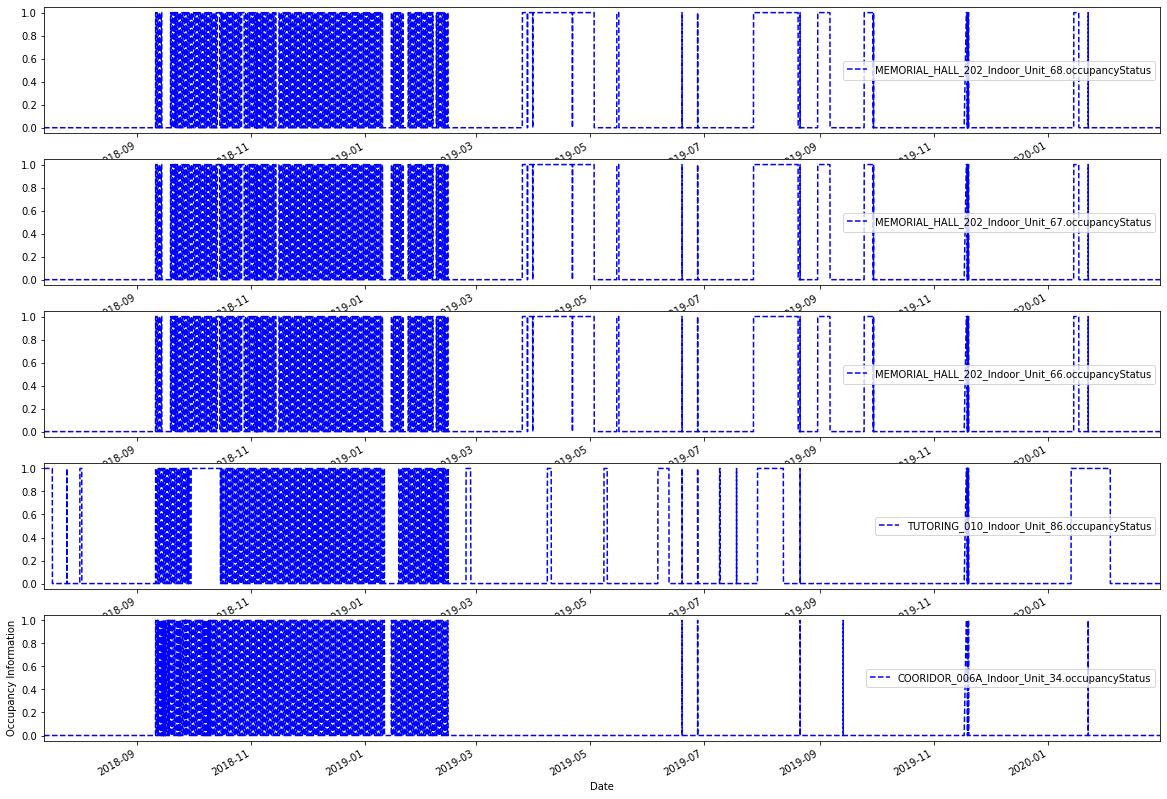

In [6]:
# plot the first 5 columns
start = 0
end = 5
dp.dataframeplot(df[df.columns[start:end]], style='-', xlabel='Date',
                 ylabel='Occupancy Information', lazy=False, legend=True)

## Collect raw Energy Meter Data for Alumni Hall

In [7]:
# load data path
energy_data = dp.readfile('./data/AH_Energy_Meter.csv',
                      timeformat='%m/%d/%Y %H:%M',
                      dateheading='Date')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['file2df', 'datetime_parse_df']
energy_data = energy_data.return_df(processmethods=processmethods)

C:\Users\avise\Anaconda3\envs\SmartBuildings\lib\site-packages\ipykernel_launcher.py:8: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  


## Cleaning the Energy Data

In [8]:
# Drop Columns where more than X% of values are NaN
x = 8
energy_data = dp.dropNaNcols(energy_data, threshold = 1-(x/100))

# Drop entire rows with NaN cells
energy_data = dp.dropNaNrows(energy_data)

## If we are interested in Electrical Energy Data, we only select those columns

In [9]:
energy_data_filtered = energy_data[['ElectricMeterProfile.currentKbtuDeltaReading']]

## If we are interested in all three types like Electrical and Cooling we only select those columns

In [10]:
energy_data_filtered = energy_data[['ElectricMeterProfile.currentKbtuDeltaReading',
                           'CHW_BTU_METER.currentKbtuDeltaReading']]

In [11]:
energy_data_filtered.head()

,ElectricMeterProfile.currentKbtuDeltaReading,CHW_BTU_METER.currentKbtuDeltaReading
Time,,
2018-07-12 08:55:00,41.211020,35.590466
2018-07-12 09:00:00,0.000000,33.027813
2018-07-12 09:05:00,0.000000,31.769627
2018-07-12 09:10:00,46.951607,34.195640
2018-07-12 09:15:00,0.000000,31.082222


## Visualize the data

Finished 'dataframeplot' in 0.4134 secs


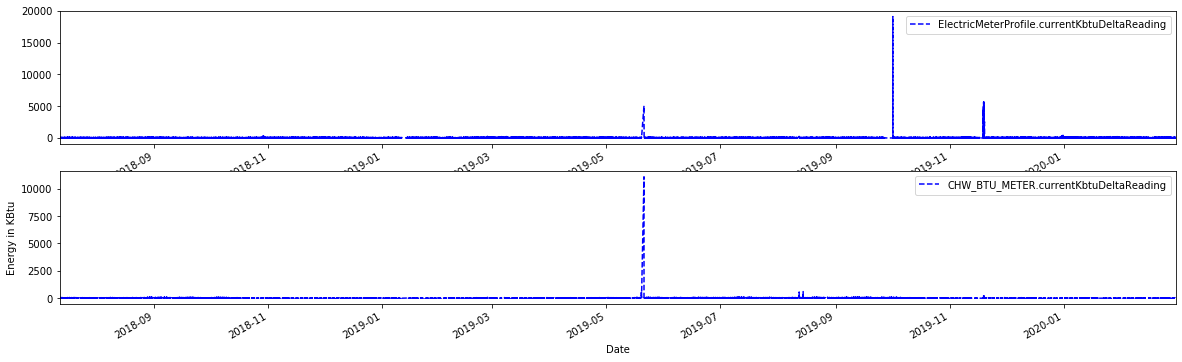

In [12]:
# plot the columns
dp.dataframeplot(energy_data_filtered, style='-', xlabel='Date',
                 ylabel='Energy in KBtu', lazy=False, legend=True)

We notice that there are some outliers in the data. We will remove the spikes by specifying upper and lower bounds. Common statistical outlier based point removal is also implemented in the dataprocessor module. That can also be used in combination with the method below

## Outlier removal

In [13]:
# remove outleirs based on bounds
# 1 remove based on hw energy bounds
# 2 remove based on chw energy bounds
# 3 remove based on electrical bounds
name = ['ElectricMeterProfile.currentKbtuDeltaReading', 
        'CHW_BTU_METER.currentKbtuDeltaReading']
u_bound = [500,200] # determined these bounds by looking at the image above
l_bound = [-10,-10]
for i in range(len(name)):
    energy_data_filtered = dp.removeoutliers(energy_data_filtered,
                            columns=[name[i]],
                            upperbound=u_bound[i],
                            lowerbound=l_bound[i])


Retaining 99.9950577318696% of the data
Finished 'removeoutliers' in 52.8696 secs



Retaining 99.99814655784901% of the data
Finished 'removeoutliers' in 58.5810 secs


Finished 'dataframeplot' in 0.7020 secs


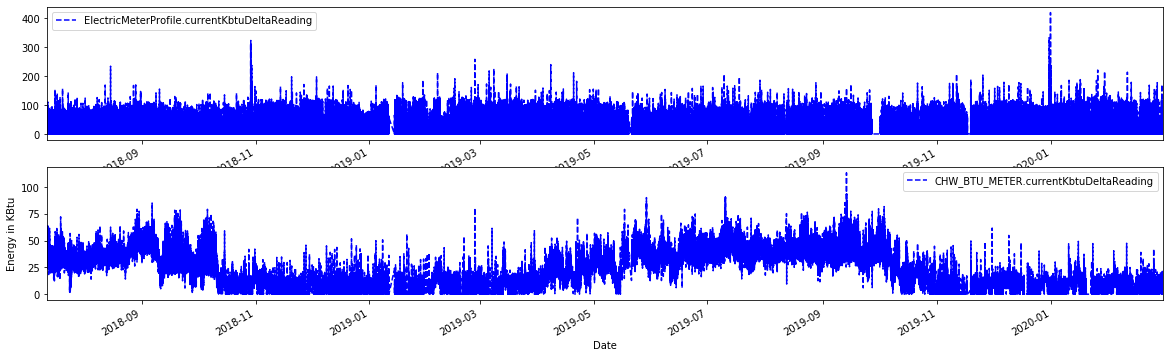

In [14]:
# let us plot the columns after removing outliers
dp.dataframeplot(energy_data_filtered, style='-', xlabel='Date',
                 ylabel='Energy in KBtu', lazy=False, legend=True)

## Now we can try to cluster the data. We can use the common K-means for a start

## To find the optimal number of clusters, we can use the elbow method
Code below adapted from [the forum here](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

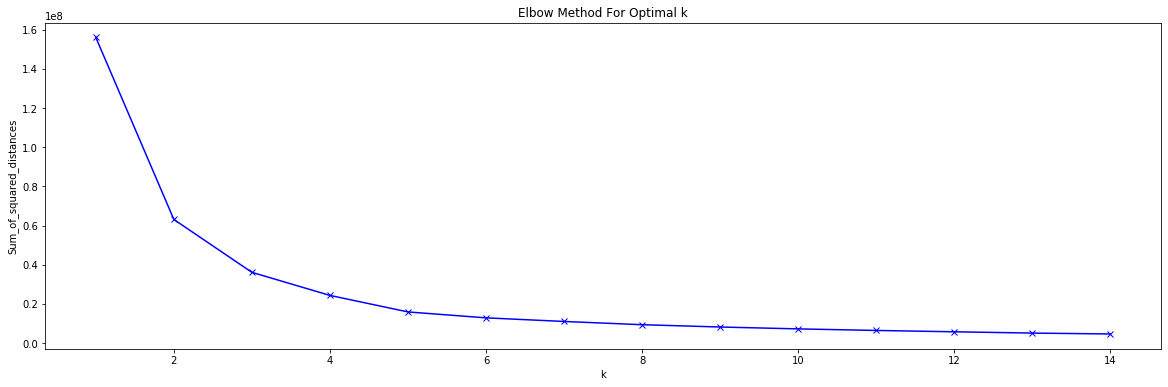

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(energy_data_filtered.to_numpy())
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Apparently, the elbow seems to be around k=5
### Let us look at the plot of the clusters formed

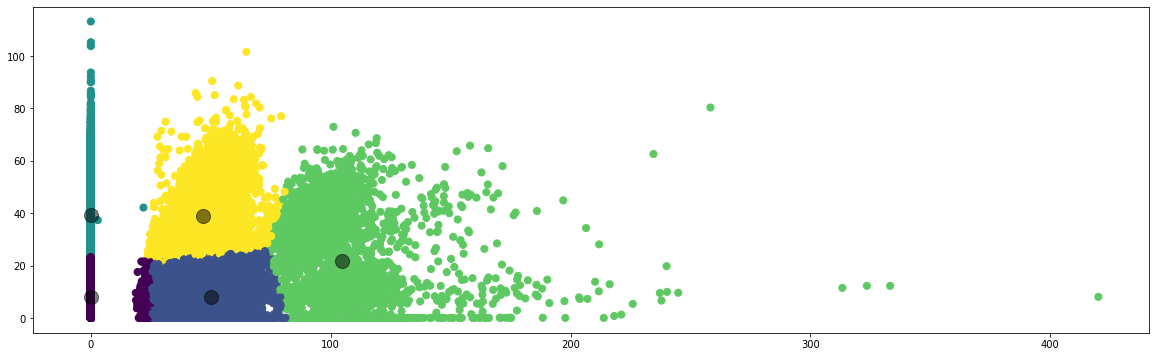

In [16]:
X = energy_data_filtered.to_numpy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### We immediately notice that cluster axis are not in the same orders of magnitude. This can skew the clustering process. Let us scale the data before performing the clustering

## Preprocess the data: Sometimes for performing unsupervised methods like clustering it is important to scale the data into an appropriate range. Otherwise the clustering is skewed by the order of magnitudes of certain variables

See this explanation on utility of scaling for clustering: https://stats.stackexchange.com/a/89813/160774

## We can do either minmax scaling to scale the data to a specific range 

In [17]:
# doing minmax scaling
energy_data_scaled, _ = dp.df_minmax_scaling(energy_data_filtered, feature_range=(0,1))

## Let us now do the clustering again

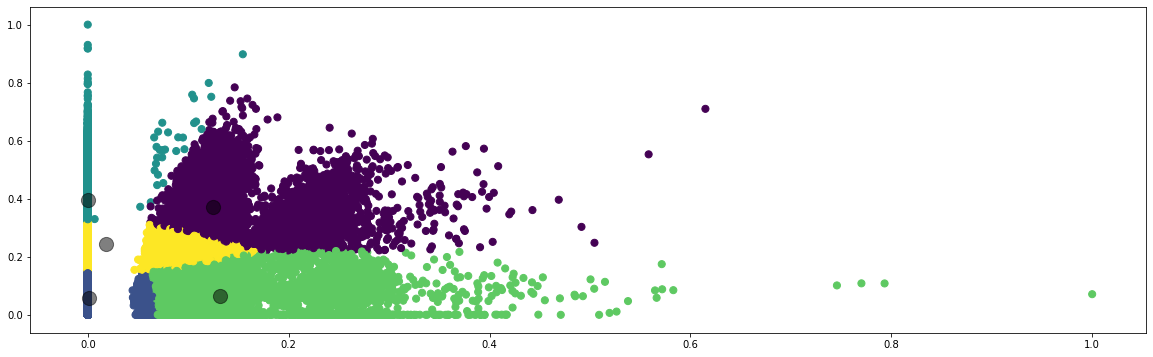

In [18]:
X = energy_data_scaled.to_numpy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Or

## standardize the data to have 0 mean and unit standard deviation - useful when training a neural network

In [19]:
# doing standardizing
energy_data_scaled, _ = dp.df_standardizing(energy_data_filtered)

## Let us now do the clustering again

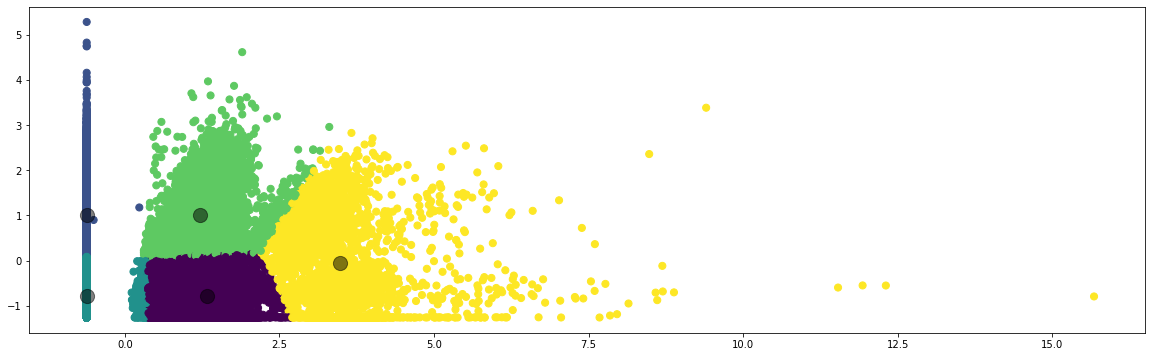

In [20]:
X = energy_data_scaled.to_numpy()
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### It seems like standardizing leads to better cluster formation than min max scaling